In [33]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import scipy
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [34]:
if not os.path.exists('constituents-financials.csv'):
    urllib.request.urlretrieve("https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv", "constituents-financials.csv")
data = pd.read_csv('constituents-financials.csv')

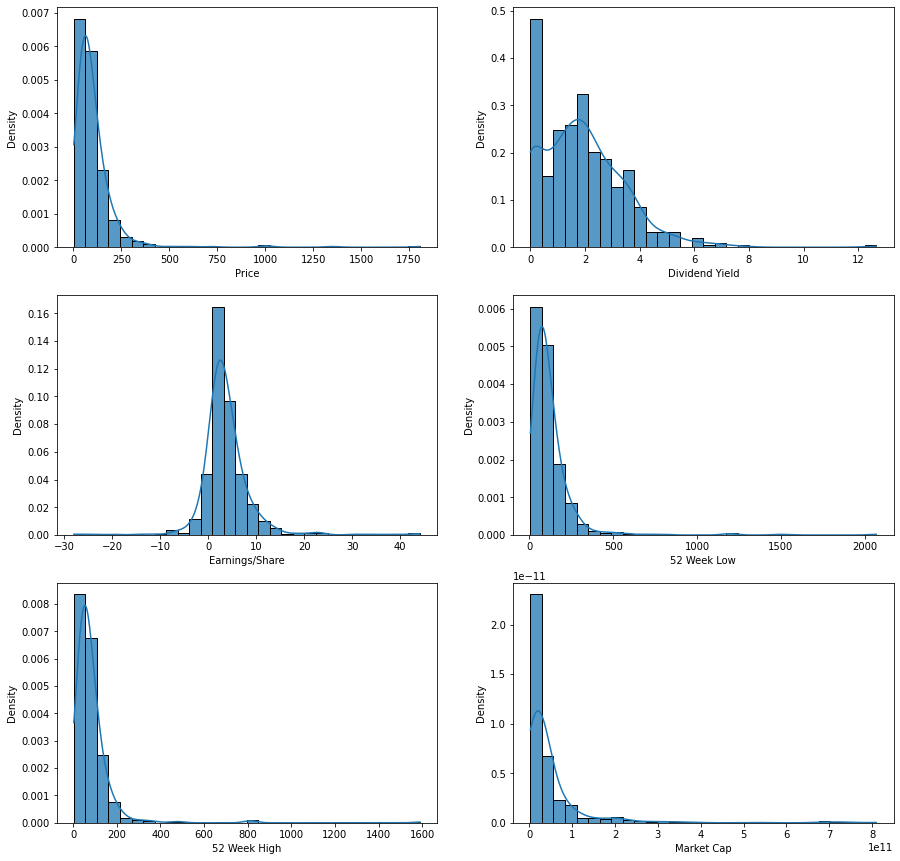

In [35]:

nbins = 30

# Price
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
kernel = st.gaussian_kde(data.Price)
min_amount, max_amount = data.Price.min(), data.Price.max()
x = np.linspace(min_amount, max_amount, len(data.Price))
kde_values = kernel(x)
sns.histplot(data.Price, kde=False, bins=nbins, stat='density', ax=ax[0, 0], palette='Set3')
ax[0, 0].plot(x, kde_values)
# ax[0, 0].set_title('Price')

# Dividend Yield
kernel = st.gaussian_kde(data['Dividend Yield'])
min_amount, max_amount = data['Dividend Yield'].min(
), data['Dividend Yield'].max()
x = np.linspace(min_amount, max_amount, len(data['Dividend Yield']))
kde_values = kernel(x)
sns.histplot(data['Dividend Yield'], kde=False, bins=nbins, stat='density', ax=ax[0, 1], palette='Set3')
ax[0, 1].plot(x, kde_values)
# ax[0, 1].set_title('Dividend Yield')

# Earnings/Share
kernel = st.gaussian_kde(data['Earnings/Share'])
min_amount, max_amount = data['Earnings/Share'].min(), data['Earnings/Share'].max()
x = np.linspace(min_amount, max_amount, len(data['Earnings/Share']))
kde_values = kernel(x)
sns.histplot(data['Earnings/Share'], kde=False, bins=nbins, stat='density', ax=ax[1, 0], palette='Set3')
ax[1, 0].plot(x, kde_values)
# ax[1, 0].set_title('Earnings/Share')

# 52 week low
kernel = st.gaussian_kde(data['52 Week Low'])
min_amount, max_amount = data['52 Week Low'].min(), data['52 Week Low'].max()
x = np.linspace(min_amount, max_amount, len(data['52 Week Low']))
kde_values = kernel(x)
sns.histplot(data['52 Week Low'], kde=False, bins=nbins, stat='density', ax=ax[1, 1], palette='Set3')
ax[1, 1].plot(x, kde_values)
# ax[1, 1].set_title('52 Week Low')

# 52 week high
kernel = st.gaussian_kde(data['52 Week High'])
min_amount, max_amount = data['52 Week High'].min(), data['52 Week High'].max()
x = np.linspace(min_amount, max_amount, len(data['52 Week High']))
kde_values = kernel(x)
sns.histplot(data['52 Week High'], kde=False, bins=nbins, stat='density', ax=ax[2, 0], palette='Set3')
ax[2, 0].plot(x, kde_values)
# ax[2, 0].set_title('52 Week High')

# market cap
kernel = st.gaussian_kde(data['Market Cap'])
min_amount, max_amount = data['Market Cap'].min(), data['Market Cap'].max()
x = np.linspace(min_amount, max_amount, len(data['Market Cap']))
kde_values = kernel(x)
sns.histplot(data['Market Cap'], kde=False, bins=nbins, stat='density', ax=ax[2, 1], palette='Set3')
ax[2, 1].plot(x, kde_values)
# ax[2, 1].set_title('Markep Cap')


In [36]:
subdataset = data[['Sector', 'Price', 'Dividend Yield', '52 Week Low', '52 Week High', 'Earnings/Share', 'Market Cap']]
subdataset['Sector_int'] = subdataset['Sector'].astype('category')
cat_columns = subdataset.select_dtypes(['category']).columns
subdataset[cat_columns] = subdataset[cat_columns].apply(lambda x: x.cat.codes)
subdataset

C:\Users\morko\AppData\Local\Temp/ipykernel_9708/655342010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdataset['Sector_int'] = subdataset['Sector'].astype('category')
g:\Programming\itmo_algorithms\itmo\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Sector,Price,Dividend Yield,52 Week Low,52 Week High,Earnings/Share,Market Cap,Sector_int
0,Industrials,222.89000,2.33286,259.77000,175.49000,7.92000,138721055226,5
1,Industrials,60.24000,1.14796,68.39000,48.92500,1.70000,10783419933,5
2,Health Care,56.27000,1.90898,64.60000,42.28000,0.26000,102121042306,4
3,Health Care,108.48000,2.49956,125.86000,60.05000,3.29000,181386347059,4
4,Information Technology,150.51000,1.71447,162.60000,114.82000,5.44000,98765855553,6
...,...,...,...,...,...,...,...,...
500,Industrials,70.24000,1.17008,76.81000,46.86000,1.83000,12915021000,5
501,Consumer Discretionary,76.30000,1.79708,86.93000,62.85000,4.07000,27003303098,0
502,Health Care,115.53000,0.79483,133.49000,108.17000,9.01000,24454698119,4
503,Financials,50.71000,1.48093,55.61000,38.43000,2.60000,10670678640,3


In [37]:
subdataset.Sector.unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Consumer Staples', 'Energy',
       'Telecommunication Services'], dtype=object)

In [38]:
print(subdataset.mean())
print(subdataset.var(ddof=1))

Price                    103.83063
Dividend Yield             1.89595
52 Week Low              122.62383
52 Week High              83.53662
Earnings/Share             3.75374
Market Cap       49239436929.50495
Sector_int                 4.05347
dtype: float64
Price                             18070.78934
Dividend Yield                        2.36303
52 Week Low                       24137.39449
52 Week High                      11177.87555
Earnings/Share                       32.36513
Market Cap       8109033310120991260672.00000
Sector_int                            7.99118
dtype: float64


C:\Users\morko\AppData\Local\Temp/ipykernel_9708/1324689052.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(subdataset.mean())
C:\Users\morko\AppData\Local\Temp/ipykernel_9708/1324689052.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(subdataset.var(ddof=1))


In [39]:
subdataset.corr()

,Price,Dividend Yield,52 Week Low,52 Week High,Earnings/Share,Market Cap,Sector_int
Price,1.00000,-0.24463,0.99508,0.98279,0.59106,0.40647,-0.04534
Dividend Yield,-0.24463,1.00000,-0.24443,-0.20795,-0.07724,-0.02179,0.25880
52 Week Low,0.99508,-0.24443,1.00000,0.98485,0.58859,0.39850,-0.04379
52 Week High,0.98279,-0.20795,0.98485,1.00000,0.60489,0.37559,-0.02639
Earnings/Share,0.59106,-0.07724,0.58859,0.60489,1.00000,0.19406,-0.05260
Market Cap,0.40647,-0.02179,0.39850,0.37559,0.19406,1.00000,-0.00174
Sector_int,-0.04534,0.25880,-0.04379,-0.02639,-0.05260,-0.00174,1.00000


<AxesSubplot:xlabel='Sector_int', ylabel='Price'>

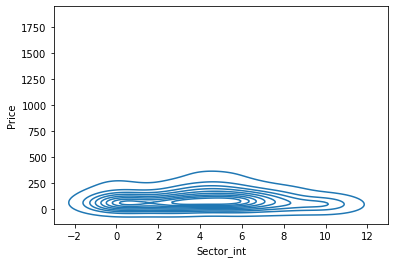

In [40]:
sns.kdeplot(data=subdataset, x='Sector_int', y='Price')

In [41]:
pairs = [
    ['Price', 'Dividend Yield'],
    ['Price', '52 Week Low'],
    ['Price', '52 Week High'],
    ['Price', 'Earnings/Share'],
    ['Price', 'Market Cap'],

    # ['Dividend Yield', '52 Week Low'],
    # ['Dividend Yield', '52 Week High'],
    # ['Dividend Yield', 'Earnings/Share'],
    # ['Dividend Yield', 'Market Cap'],

    # ['52 Week Low', '52 Week High'],
    # ['52 Week Low', 'Earnings/Share'],
    # ['52 Week Low', 'Market Cap'],

    # ['52 Week Low', 'Earnings/Share'],
    # ['52 Week Low', 'Market Cap'],

    # ['Earnings/Share', 'Market Cap']
]
for x, y in pairs:
    r, p = st.pearsonr(subdataset[x], subdataset[y])
    r_z = np.arctanh(r)  # matches Fisher transform
    # Corresponding standard deviation
    se = 1/np.sqrt(subdataset[x].size-3)
    alpha = 0.05
    z = st.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se

    print('Conf int for the corr coef {} & {}: {:.4f}:{:.4f} '.format(x, y, lo_z, hi_z))


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Conf int for the corr coef Price & Dividend Yield: -0.3372:-0.1622 
Conf int for the corr coef Price & 52 Week Low: 2.9147:3.0897 
Conf int for the corr coef Price & 52 Week High: 2.2858:2.4608 
Conf int for the corr coef Price & Earnings/Share: 0.5918:0.7668 
Conf int for the corr coef Price & Market Cap: 0.3439:0.5189 


# Conditional mean and variance
Lets calculate conditional mean and variance for those entries where Sector is Energy or Financials

In [42]:
print(subdataset[subdataset.Sector=='Energy'].mean())
print(subdataset[subdataset.Sector=='Energy'].var(ddof=1))
print(subdataset[subdataset.Sector=='Financials'].mean())
print(subdataset[subdataset.Sector=='Financials'].var(ddof=1))

Price                     57.88750
Dividend Yield             2.01445
52 Week Low               72.58969
52 Week High              48.14123
Earnings/Share            -1.64844
Market Cap       42416053523.40625
Sector_int                 2.00000
dtype: float64
Price                              1496.41755
Dividend Yield                        2.29847
52 Week Low                        1927.93395
52 Week High                        905.86039
Earnings/Share                       32.93986
Market Cap       4259419893082780860416.00000
Sector_int                            0.00000
dtype: float64
Price                     89.05603
Dividend Yield             2.01724
52 Week Low              101.82185
52 Week High              72.69447
Earnings/Share             4.43691
Market Cap       50627198012.52941
Sector_int                 3.00000
dtype: float64
Price                              5468.48158
Dividend Yield                        1.01203
52 Week Low                        7183.40489
52 We

C:\Users\morko\AppData\Local\Temp/ipykernel_9708/122357207.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(subdataset[subdataset.Sector=='Energy'].mean())
C:\Users\morko\AppData\Local\Temp/ipykernel_9708/122357207.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(subdataset[subdataset.Sector=='Energy'].var(ddof=1))
C:\Users\morko\AppData\Local\Temp/ipykernel_9708/122357207.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(subdataset[subdataset.Sector=='Financi

# Linear Regression Without scaling

In [43]:
# Highlight predictors
X = subdataset[[ 'Dividend Yield', '52 Week Low', '52 Week High', 'Earnings/Share', 'Market Cap']]
# Allocate the target variable
y = data[['Price']]
# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

x = []
for i in range(len(y_test)):
    x.append(i)
# Create a linear regression model
reg = LinearRegression()
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_, reg.coef_)
print('model parameters:')
print('model weights:', reg.coef_)
print('model bias:', reg.intercept_)


# Calculation of model metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape.squeeze())
print('Determination coefficient = ', reg.score(X_test, y_test))



model parameters:
model weights: [[-1.57809581e+00  5.70172368e-01  3.67851693e-01  6.89623998e-01
   1.42781342e-11]]
model bias: [2.400048]
Mean absolute error =  7.012177161442886
Mean squared error =  297.1090998973216
Mean absolute percentage error =  7.880076464327907
Determination coefficient =  0.9795487446459494


# Linear Regression With scaling

In [44]:
# Highlight predictors
X = subdataset[[ 'Dividend Yield', '52 Week Low', '52 Week High', 'Earnings/Share', 'Market Cap']]
# Allocate the target variable
y = data[['Price']]
# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

x = []
for i in range(len(y_test)):
    x.append(i)
# Create a linear regression model
reg = LinearRegression()
# Train a linear regression model
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
y_train = pd.DataFrame(scaler.fit_transform(y_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
y_test = pd.DataFrame(scaler.fit_transform(y_test))
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_, reg.coef_)
print('model parameters:')
print('model weights:', reg.coef_)
print('model bias:', reg.intercept_)


# Calculation of model metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape.squeeze())
print('Determination coefficient = ', reg.score(X_test, y_test))


model parameters:
model weights: [[-0.01843042  0.66571478  0.30547735  0.02755211  0.00901909]]
model bias: [1.73371931e-16]
Mean absolute error =  0.06493293099153129
Mean squared error =  0.01106715765695621
Mean absolute percentage error =  37.42905252322552
Determination coefficient =  0.9889328423430438


# Plotting the distribution of Residuals (w/out Regularization)

(505,)


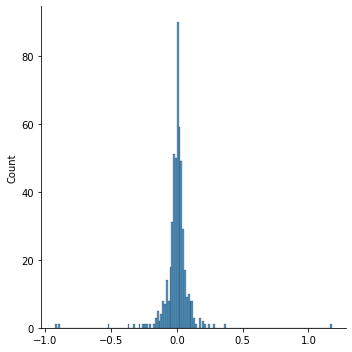

In [45]:
X = subdataset[[ 'Dividend Yield', '52 Week Low', '52 Week High', 'Earnings/Share', 'Market Cap']]
y = data[['Price']]
X = pd.DataFrame(scaler.fit_transform(X))
y_pred_all = reg.predict(X)
y = pd.DataFrame(scaler.fit_transform(y))
y1 = np.array(y)
y2 = np.array(y_pred_all)
print(y1[:,0].shape)
y_diff = y1[:,0] - y2[:,0]
sns.displot(y_diff, kde=False)

# Linear Regression with Regularization

In [46]:
# Highlight predictors
X = subdataset[[ 'Dividend Yield', '52 Week Low', '52 Week High', 'Earnings/Share', 'Market Cap']]
# Allocate the target variable
y = data[['Price']]
# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

x = []
for i in range(len(y_test)):
    x.append(i)
# Create a linear regression model
lasso = Lasso(alpha=0.1)
# Train a linear regression model
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
y_train = pd.DataFrame(scaler.fit_transform(y_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
y_test = pd.DataFrame(scaler.fit_transform(y_test))
lasso.fit(X_train, y_train)
# Forecast on a test sample
y_pred = np.expand_dims(lasso.predict(X_test), 1)
params = np.append(lasso.intercept_, lasso.coef_)
print('model parameters:')
print('model weights:', lasso.coef_)
print('model bias:', lasso.intercept_)


# Calculation of model metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape.squeeze())
print('Determination coefficient = ', lasso.score(X_test, y_test))

model parameters:
model weights: [-0.          0.66592484  0.23109834  0.          0.        ]
model bias: [1.65940843e-16]
Mean absolute error =  0.05894244838102466
Mean squared error =  0.018247316622086073
Mean absolute percentage error =  35.65032262162846
Determination coefficient =  0.9817526833779139


# Plotting the distribution of residuals (w/ Regularization)

(505,)


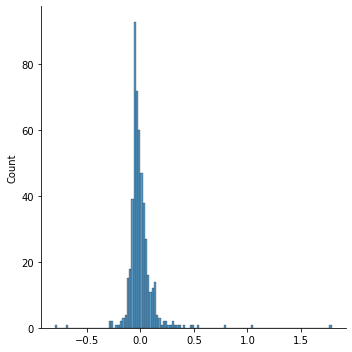

In [47]:


X = subdataset[[ 'Dividend Yield', '52 Week Low', '52 Week High', 'Earnings/Share', 'Market Cap']]
y = data[['Price']]
X = pd.DataFrame(scaler.fit_transform(X))
y_pred_all = np.expand_dims(lasso.predict(X), 1)
y = pd.DataFrame(scaler.fit_transform(y))
y1 = np.array(y)
y2 = np.array(y_pred_all)
print(y1[:,0].shape)
y_diff = y1[:,0] - y2[:,0]
sns.displot(y_diff, kde=False)